In [1]:
# T harfi için
# 0: Black
# 1: White
# of edge: 8
# of corner: 8
# External 1 0 veya 0 1 veya 0 0 veya 0 0
# 0 0 0 0 1 0 0 1
# Internal 0 1 veya 1 0 veya 1 1 veya 1 1
# 1 1 1 1 0 1 1 0
#i_m : interal mask , e_m : external mask

i_m_1=[[1,0],[0,0]]
i_m_2=[[0,1],[0,0]]
i_m_3=[[0,0],[1,0]]
i_m_4=[[0,0],[0,1]]

e_m_1=[[0,1],[1,1]]
e_m_2=[[1,0],[1,1]]
e_m_3=[[1,1],[0,1]]
e_m_4=[[1,1],[1,0]]

i_m_l=[i_m_1,i_m_2,i_m_3,i_m_4]
e_m_l=[e_m_1,e_m_2,e_m_3,e_m_4]

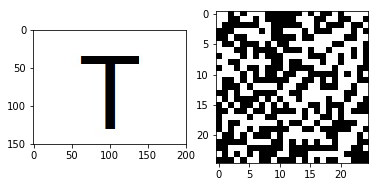

In [2]:
import numpy as np
import matplotlib.pyplot as plt

img_1=plt.imread('C:\\Users\\Karaca\\Documents\\GoruntuIsleme\\T.jpg')

#SAHTE RESİM OLUŞTURMA
size=25
img_3=np.random.randint(0,2,(size,size))
img_3    #sahte resim , you should read from a file.

plt.subplot(1,2,1), plt.imshow(img_1,cmap='Greys',interpolation='nearest')
plt.subplot(1,2,2), plt.imshow(img_3,cmap='Greys',interpolation='nearest')
plt.show()

In [14]:
image_5=np.zeros(img_1.shape[0:2])

In [20]:
def Cevir(image):
    threshold=100
    for i in range(img_1.shape[0]):
        for j in range(img_1.shape[1]):
            n=img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3
            image[i,j]=n
            if n>threshold:
                image_5[i,j]=0
            else:
                image_5[i,j]=255 
    return image_5

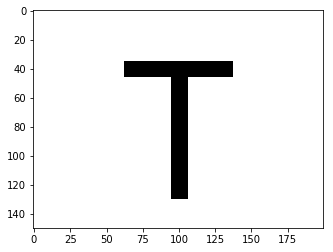

In [21]:
plt.imshow(Cevir(img_1) , plt.cm.binary)
plt.show()

In [22]:
c=Cevir(img_1)
c.ndim

2

In [23]:
def count_mask(image,mask):
    counter=0
    m,n=image.shape
    for i in range (m-1):
        for j in range (n-1):
            a=b=c=d=False
            if (image[i,j]==mask[0][0]):
                a=True
            if (image[i,j+1]==mask[0][1]):
                b=True
            if (image[i+1,j]==mask[1][0]):
                c=True
            if (image[i+1,j+1]==mask[1][1]):
                d=True
            if (a and b and c and d):
                counter=counter+1
    return counter

In [24]:
def count_internal_mask(image):
    counter_internal=0
    for mask in i_m_l:
        counter_internal=counter_internal + count_mask(image,mask)
    return counter_internal

def count_external_mask(image):
    counter_external=0
    for mask in e_m_l:
        counter_external=counter_external + count_mask(image,mask)
    return counter_external

In [25]:
c_1=count_internal_mask(img_3) # Köşe sayısı
c_2=count_external_mask(img_3) # Köşe içinde kalan alan
c_1,c_2

(150, 152)

In [26]:
#ödev math.abs(c_1-c_2)/4

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.misc import imsave
%matplotlib inline

In [28]:
def convert_RGB_to_gray_level(image_1):
    img_1=plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            img_2[i,j]=img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3
    # print(img_1.shape)
    return img_2

In [29]:
def convert_RGB_to_monochrome_BW(image_1,threshold=100):
    img_1=plt.imread(image_1)
    img_2=np.zeros((img_1.shape[0],img_1.shape[1]))
    for i in range(img_2.shape[0]):
        for j in range(img_2.shape[1]):
            if (img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3)>threshold:
                # img_2[i,j]=img_1[i,j,0]/3+img_1[i,j,1]/3+img_1[i,j,2]/3
                img_2[i,j]=1
            else:
                img_2[i,j]=0
    #print(img_1.shape)
    return img_2

In [30]:
def create_mask_internal():
    i_m_1=np.array([[1,0],[0,0]])
    i_m_2=np.array([[0,1],[0,0]])
    i_m_3=np.array([[0,0],[1,0]])
    i_m_4=np.array([[0,0],[0,1]])
    i_m_l=[i_m_1,i_m_2,i_m_3,i_m_4]
    return i_m_l

def create_mask_external():
    e_m_1=np.array([[0,1],[1,1]])
    e_m_2=np.array([[1,0],[1,1]])
    e_m_3=np.array([[1,1],[0,1]])
    e_m_4=np.array([[1,1],[1,0]])
    e_m_l=[e_m_1,e_m_2,e_m_3,e_m_4]
    return e_m_l

In [31]:
def count_object(image_name_with_path,threshold=150):
    img_file_1=image_name_with_path
    img_file_2=convert_RGB_to_gray_level(img_file_1)
    img_file_3=convert_RGB_to_monochrome_BW(img_file_1,threshold)
    image=img_file_3
    c_1=0
    c_2=0
    m,n=image.shape
    for i in range(m-1):
        for j in range(n-1):
            for mask in create_mask_internal():
                if False not in (img_file_3[i:i+2,j:j+2]==mask):
                    #print("e mask bulundu")
                    c_1=c_1+1
                for mask in create_mask_external():
                    if False not in (img_file_3[i:i+2,j:j+2]==mask):
                        #print("i mask bulundu")
                        c_2=c_2+1
    number_of_objects=math.fabs((c_2-c_1)/4)
    print("resimde toplam T sayısı : ",number_of_objects)
    return number_of_objects

In [34]:
image_file_1=r"C:\\Users\\Karaca\\Documents\\GoruntuIsleme\\T_kume.jpg"
count_object(image_file_1)

resimde toplam T sayısı :  27.5


27.5